In [8]:
#The first principal component of the data is the direction in which the data varies the most. 
#In this exercise, our job is to use PCA to find the first principal component of the length and 
#width measurements of the grain samples, and represent it as an arrow on the scatter plot.

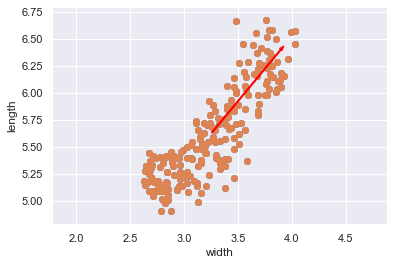

In [9]:
"------------------For Cellecting the data-----------------"
import pandas as pd
"-----------------------------------"
pd.set_option('display.max.columns',None)
pd.set_option('display.max.rows',None)
df=pd.read_csv('seeds-width-vs-length.csv',header=None)
#print(df.shape)
grains=df.values
#print(type(grains))
#print(grains.shape)
"------------------------------------------------------------------"
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])
plt.xlabel('width')
plt.ylabel('length')
from sklearn.decomposition import PCA

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

Conclusion:
- This is the direction in which the grain data varies the most.
- In Mathematical term, it is the first basis vector of two linearly independent basis.
- Now we take the fish dataset and find the intrinsic dimenssion of this dataset.

In [10]:
#The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the 
#PCA features to find out. 

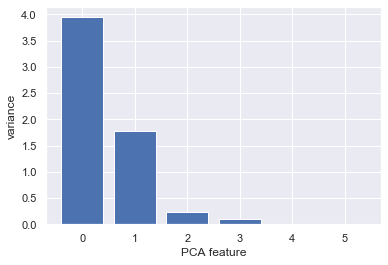

In [11]:
"Collecting the data"
fish=pd.read_csv('fish.csv',header=None)
#print(fish.head())
samples=fish.drop(0,axis=1).values
#print(sample)
"-----------------------"
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Conclusion:
- It looks like PCA features 0 and 1 have significant variance. Intrinsic dimmension of this six dimensional dataset is 2!

- As we have seen from the bar plot that these 6-D data is actually 2-D. 
- We Now use PCA for dimensionality reduction of the fish measurements, retaining only the most important components (that are 2).


(85, 2)


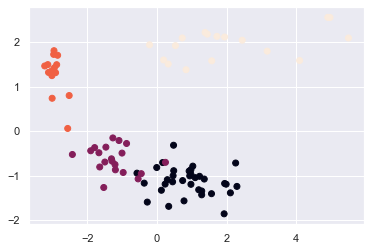

In [12]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_samples=scale.fit_transform(samples) # Scaled the sample data

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

"Just for myself"
mapping={'Bream':0,'Roach':1,'Smelt':2,'Pike':3}
species=fish[0].map(mapping)
import matplotlib.pyplot as plt
xs=pca_features[:,0]
ys=pca_features[:,1]
plt.scatter(xs,ys,c=species)
plt.savefig('1.jpg')
plt.show()


Conclusion:
- Remarkebly despite having the reduce the dimensions from 6 to 2, all four species can still be distnguished on a scatter plot.